In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

In [43]:
data = pd.read_csv('datasets/train_prompt.tsv', sep='\t')
data['emotion'] = data['emotion'].str.lower()
data

,empathy,distress,essay,emotion,gender,education,race,age,income,personality_conscientiousness,...,distress_count,prompt,conversation_id,article_id,speaker_id,speaker_number,split,prompt_bio,prompt_emp,prompt_emo
0,5.667000,4.375,it is really diheartening to read about these ...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,3.199801,An essay written by a 33.0 years old white mal...,NaN,NaN,NaN,NaN,NaN,An essay written by a 33.0 years old white mal...,The essay expresses high empathy and medium di...,The top emotions expressed in the essay are: ...
1,4.833000,4.875,the phone lines from the suicide prevention li...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,2.715752,An essay written by a 33.0 years old white mal...,NaN,NaN,NaN,NaN,NaN,An essay written by a 33.0 years old white mal...,The essay expresses medium empathy and medium ...,The top emotions expressed in the essay are: ...
2,5.333000,3.500,"no matter what your heritage, you should be ab...",neutral,1.0,4.0,1.0,33.0,50000.0,6.00,...,2.954012,An essay written by a 33.0 years old white mal...,NaN,NaN,NaN,NaN,NaN,An essay written by a 33.0 years old white mal...,The essay expresses high empathy and medium di...,The top emotions expressed in the essay are: ...
3,4.167000,5.250,it is frightening to learn about all these sha...,fear,1.0,4.0,1.0,33.0,50000.0,6.00,...,3.035200,An essay written by a 33.0 years old white mal...,NaN,NaN,NaN,NaN,NaN,An essay written by a 33.0 years old white mal...,The essay expresses medium empathy and high di...,The top emotions expressed in the essay are: ...
4,5.333000,4.625,the eldest generation of russians aren't being...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,2.945490,An essay written by a 33.0 years old white mal...,NaN,NaN,NaN,NaN,NaN,An essay written by a 33.0 years old white mal...,The essay expresses high empathy and medium di...,The top emotions expressed in the essay are: ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,1.000000,1.625,"After reading the article, i felt really alarm...",fear/hope,1.0,6.0,1.0,29.0,85000.0,6.75,...,2.804874,"An essay written by a 29 years old white male,...",430.0,397.0,17.0,1.0,train,An essay written by a 29.0 years old white mal...,The essay expresses low empathy and low distre...,The top emotions expressed in the essay are: ...
2433,2.500000,1.500,It's very difficult to fathom living somewhere...,joy/sadness,2.0,7.0,1.0,38.0,42000.0,7.00,...,2.915323,An essay written by a 38 years old white femal...,374.0,367.0,24.0,1.0,train,An essay written by a 38.0 years old white fem...,The essay expresses low empathy and low distre...,The top emotions expressed in the essay are: ...
2434,3.166667,2.750,it's crazy how islamic terrorism is still a th...,anger/surprise,1.0,6.0,1.0,34.0,68000.0,5.50,...,2.713512,"An essay written by a 34 years old white male,...",260.0,174.0,46.0,2.0,train,An essay written by a 34.0 years old white mal...,The essay expresses medium empathy and low dis...,The top emotions expressed in the essay are: ...
2435,6.666667,6.375,Humans are the most selfish and wicked of all ...,disgust/neutral,1.0,7.0,1.0,28.0,165000.0,6.25,...,3.028520,"An essay written by a 28 years old white male,...",98.0,57.0,40.0,2.0,train,An essay written by a 28.0 years old white mal...,The essay expresses high empathy and high dist...,The top emotions expressed in the essay are: ...


In [44]:
emotions = []
for perceived_emotion in data['emotion'].unique():
	for emotion in perceived_emotion.split('/'):
		if emotion not in emotions:
			emotions.append(emotion)
for emotion in emotions:
	data[emotion] = data["emotion"].str.lower().str.contains(emotion).astype(int)

In [45]:
def plot_emotions_distribution(data):
	_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

	data['emotion'].value_counts().plot(
		kind='bar',
		xlabel='Emotion',
		ylabel='Number of essays',
		ax=ax1
	)

	data[emotions].sum().sort_values(ascending=False).plot(
		kind='bar',
		xlabel='Emotion',
		ylabel='Number of essays',
		ax=ax2
		)

	plt.plot()

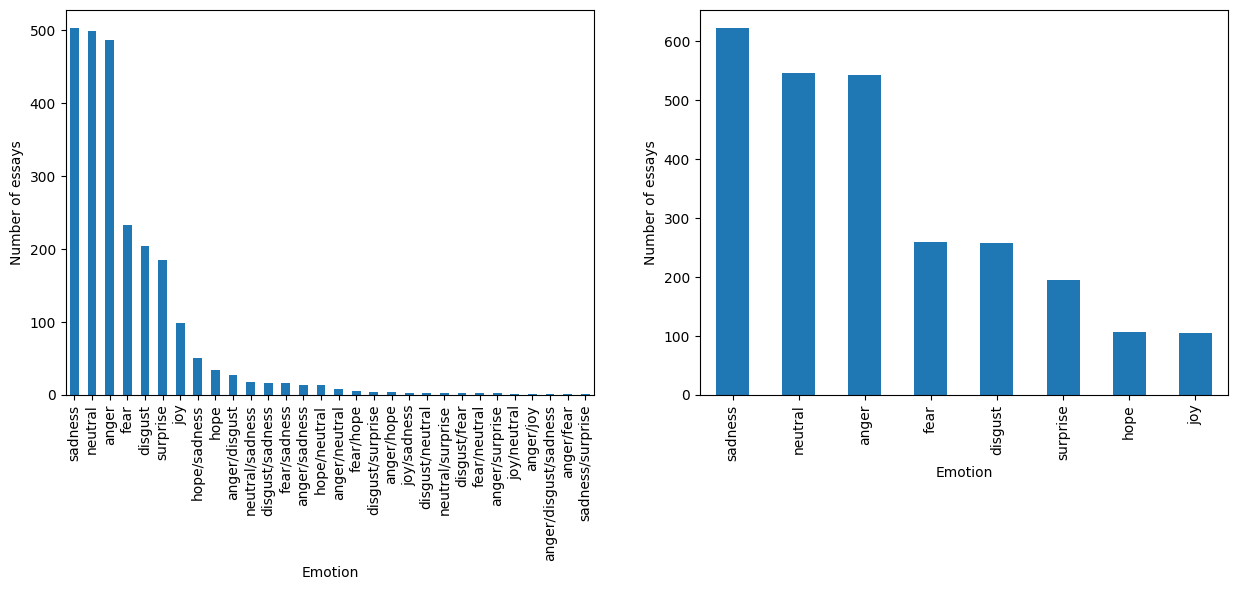

In [46]:
plot_emotions_distribution(data)

In [47]:
cond_to_double = (data['sadness']==0) & (data['neutral']==0) & (data['anger']==0 & (data['hope']==0)) # raddoppia anche hope
to_double = data[cond_to_double]
not_to_double = data[~cond_to_double]
doubled = pd.concat([to_double]*2, ignore_index=True)
new_data = pd.concat([not_to_double, doubled], ignore_index=True)

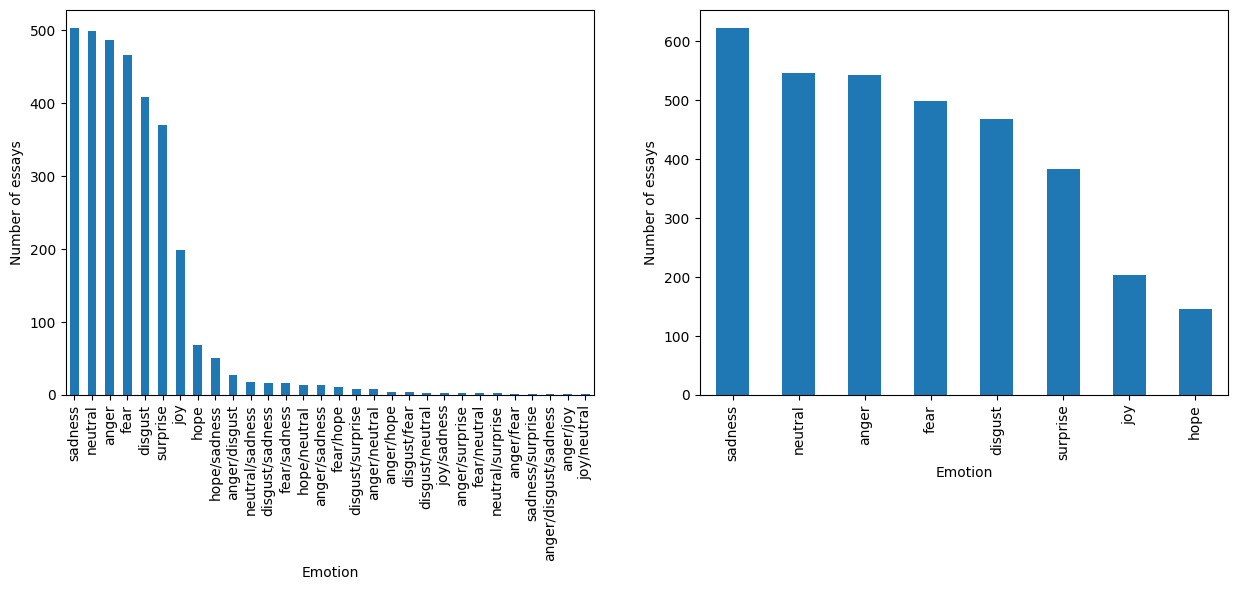

In [48]:
plot_emotions_distribution(new_data)

In [49]:
def upsample(data, class_label_to_upsample, n_samples):
    '''
    This function resamples the class label passed as parameter and returns the
    upsampled data set.

    :param data: the data set to upsample
    :param class_label_to_upsample: the class label to upsample
    :param n_samples: the number of samples to upsample to
    '''
    
    data_to_upsample = data[data[class_label_to_upsample] == 1]
    other_data = data[data[class_label_to_upsample] != 1]
    upsampled_data = resample(
        data_to_upsample,
        replace=True,
        n_samples=n_samples,
        random_state=42
        )
    new_data = pd.concat([upsampled_data, other_data])
    return new_data

In [50]:
new_data_hope = upsample(new_data, 'hope', 200)

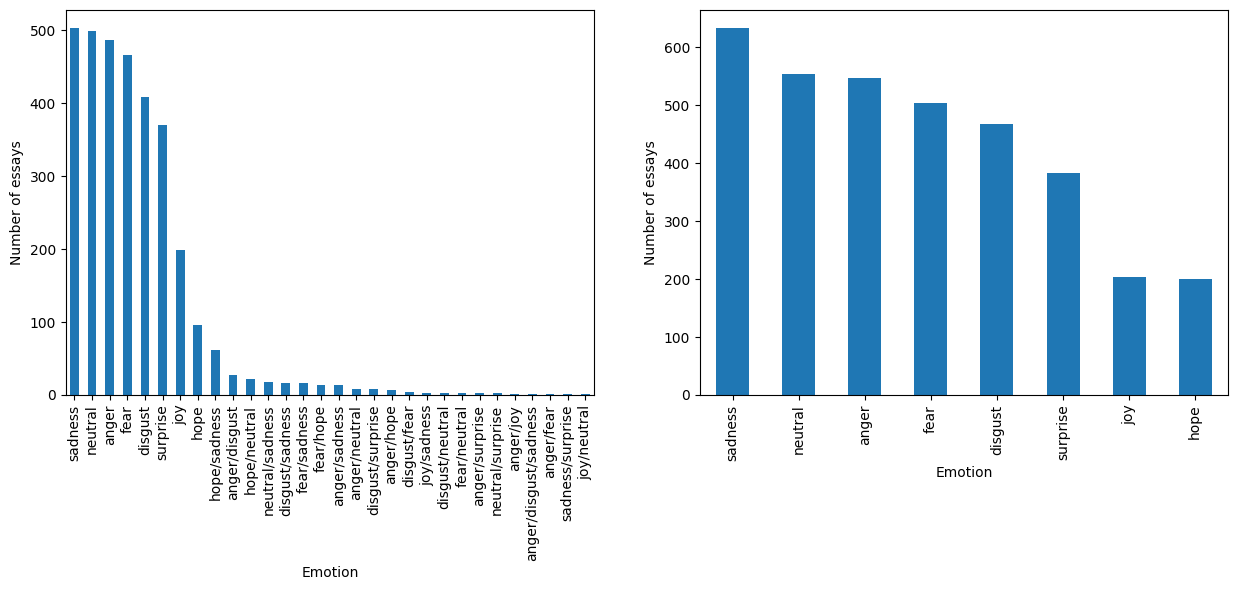

In [51]:
plot_emotions_distribution(new_data_hope)

In [52]:
# save df
new_data_hope.to_csv('./datasets/train_upsampled.tsv', sep='\t', index=False)